In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
# fetch data 

mco_syr_sw_data = pd.read_csv('flight_data\mco_syr_sw_22_23.csv')
mco_syr_jb_data = pd.read_csv('flight_data\mco_syr_jb_22_23.csv')
jfk_syr_jb_data = pd.read_csv('flight_data\jfk_syr_jb_22_23.csv')
jfk_syr_end_data = pd.read_csv('flight_data\jfk_syr_end_22_23.csv')
ord_syr_ua_data = pd.read_csv('flight_data\ord_syr_ua_22_23.csv')
ord_syr_aa_data = pd.read_csv('flight_data\ord_syr_aa_22_23.csv')
# mco_syr_sw_data.head()
# mco_syr_jb_data.head()
# jfk_syr_jb_data.head()
# jfk_syr_end_data.head()
# ord_syr_ua_data.head()
# ord_syr_aa_data.head()

In [3]:
dfs = [ord_syr_aa_data,ord_syr_ua_data,jfk_syr_end_data,jfk_syr_jb_data,mco_syr_jb_data,mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2022-01-01,4316,N900AE,SYR,15:28,0:00,107,0,...,0:00,0,0,0,0,0,0,18,5,2022
1,1,MQ,2023-01-01,3392,N283NN,SYR,18:25,18:24,111,104,...,21:02,6,0,0,0,0,0,21,6,2023
2,2,MQ,2023-01-01,3518,N213NN,SYR,13:05,13:01,117,96,...,15:33,4,0,0,0,0,0,16,6,2023
3,3,MQ,2022-01-02,4134,N900AE,SYR,10:25,10:21,111,146,...,13:43,4,0,0,31,0,0,13,6,2022
4,4,MQ,2022-01-02,4253,N238NN,SYR,17:25,17:51,107,116,...,20:40,7,0,26,9,0,0,20,6,2022


5623

In [5]:
main_data.dtypes



Unnamed: 0                             int64
Carrier_Code                          object
Date                                  object
Flight_Number                          int64
Tail_Number                           object
Destination_Airport                   object
Scheduled departure time              object
Actual departure time                 object
Scheduled elapsed time (Minutes)       int64
Actual elapsed time (Minutes)          int64
Departure delay (Minutes)              int64
Wheels-off time                       object
Taxi-Out time (Minutes)                int64
dep_Delay_Carrier                      int64
dep_Delay_Weather                      int64
dep_Delay_National_Aviation_System     int64
dep_Delay_Security                     int64
dep_Delay_Late_Aircraft_Arrival        int64
dep_hour                               int64
dep_day                                int64
dep_year                               int64
dep_order                             object
Origin_Air

In [6]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival',
                         'dep_year','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [7]:
sub_data.dtypes


Carrier_Code                 object
Date                         object
Flight_Number                 int64
Tail_Number                  object
Scheduled departure time     object
Departure delay (Minutes)     int64
dep_hour                      int64
dep_day                       int64
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)       int64
arr_hour                      int64
arr_day                       int64
dtype: object

In [8]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day
0,MQ,2022-01-01,4316,N900AE,15:28,0,15,5,latter,ORD,18:15,0,18,5
1,MQ,2023-01-01,3392,N283NN,18:25,-1,18,6,latter,ORD,21:16,-8,21,6
2,MQ,2023-01-01,3518,N213NN,13:05,-4,13,6,latter,ORD,16:02,-25,16,6
3,MQ,2022-01-02,4134,N900AE,10:25,-4,10,6,latter,ORD,13:16,31,13,6
4,MQ,2022-01-02,4253,N238NN,17:25,26,17,6,latter,ORD,20:12,35,20,6


In [9]:
sub_data['dep_min'] = sub_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
# def round_to_nearest_quarter(minute):
#     if 0 <= minute < 14:
#         return 0
#     elif 15 <= minute < 29:
#         return 15
#     elif 30 <= minute < 44:
#         return 30
#     else:
#         return 45
sub_data['Date'] = pd.to_datetime( sub_data['Date'],format ="%Y-%m-%d")
sub_data['Date'] = sub_data['Date'].dt.strftime('%m/%d/%Y')
sub_data['dep_minutes'] = 0
sub_data['dep_minutes'] = sub_data['dep_minutes'].astype('object')
sub_data['dep_hours'] = sub_data['dep_hour'].astype('object')
sub_data['dep_min'] = sub_data['dep_min'].astype('object')
sub_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
sub_data['arr_minutes'] = 0
sub_data['arr_minutes'] = sub_data['arr_minutes'].astype('object')
sub_data['arr_hours'] = sub_data['arr_hour'].astype('object')
sub_data['arr_min'] = sub_data['arr_min'].astype('object')
sub_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
sub_data['dep_hour'] = main_data['dep_hour'].astype('object')
sub_data['dep_day'] = main_data['dep_day'].astype('object')
sub_data['arr_hour'] = main_data['arr_hour'].astype('object')
sub_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (sub_data['Arrival Delay (Minutes)'] > 5),
    (sub_data['Arrival Delay (Minutes)'] >=-5) & (sub_data['Arrival Delay (Minutes)'] <= 5),
    (sub_data['Arrival Delay (Minutes)'] < -5)
]
conditions2 = [
    (sub_data['Departure Delay (Minutes)'] > 5),
    (sub_data['Departure Delay (Minutes)'] >=-5) & (sub_data['Departure Delay (Minutes)'] <= 5),
    (sub_data['Departure Delay (Minutes)'] < -5)
]
choices = [2,1,0]
sub_data['arr_status'] = np.select(conditions, choices)
sub_data['dep_status'] = np.select(conditions, choices)
sub_data.dtypes
sub_data.head()
len(sub_data)

Carrier_Code                 object
Date                         object
Flight_Number                object
Tail_Number                  object
Scheduled departure time     object
Departure delay (Minutes)     int64
dep_hour                     object
dep_day                      object
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)       int64
arr_hour                     object
arr_day                      object
dep_min                      object
dep_minutes                  object
dep_hours                    object
arr_min                      object
arr_minutes                  object
arr_hours                    object
arr_status                    int32
dtype: object

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,dep_minutes,dep_hours,arr_min,arr_minutes,arr_hours,arr_status
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,0,18,5,28,0,15,15,0,18,1
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,-8,21,6,25,0,18,16,0,21,0
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,-25,16,6,5,0,13,2,0,16,0
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,31,13,6,25,0,10,16,0,13,2
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,35,20,6,25,0,17,12,0,20,2


5623

In [10]:
#sub_data.to_csv('sub_data.csv', index=False)

In [11]:
len(sub_data)
sub_data= sub_data[sub_data['Arrival Delay (Minutes)'] < 120]
len(sub_data)

5623

5428

In [12]:
arr_traffic = pd.read_csv('arr_traffic.csv')

In [13]:
arr_traffic['arr_hour'] = arr_traffic['arr_hour'].astype('object')
arr_traffic.drop(columns=['Unnamed: 0'],inplace = True)
arr_traffic.head()
len(arr_traffic)
arr_traffic.dtypes

,Date,arr_hour,count
0,01/01/2019,0,4
1,01/01/2019,7,1
2,01/01/2019,10,3
3,01/01/2019,11,8
4,01/01/2019,13,1


23856

Date        object
arr_hour    object
count        int64
dtype: object

In [14]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, arr_traffic, how='left', on=['Date', 'arr_hour'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_hour,arr_day,dep_min,dep_minutes,dep_hours,arr_min,arr_minutes,arr_hours,arr_status,count
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,18,5,28,0,15,15,0,18,1,6
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,21,6,25,0,18,16,0,21,0,2
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,16,6,5,0,13,2,0,16,0,5
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,13,6,25,0,10,16,0,13,2,3
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,20,6,25,0,17,12,0,20,2,3


In [15]:
dep_traffic = pd.read_csv('dep_traffic.csv')

In [16]:
dep_traffic['dep_hour'] = dep_traffic['dep_hour'].astype('object')
dep_traffic.drop(columns=['Unnamed: 0'],inplace = True)
dep_traffic.head()
len(dep_traffic)
dep_traffic.dtypes

,Origin_Airport,Date,dep_hour,count
0,JFK,1/1/2022,5,2
1,JFK,1/1/2022,6,8
2,JFK,1/1/2022,7,4
3,JFK,1/1/2022,8,12
4,JFK,1/1/2022,9,11


38736

Origin_Airport    object
Date              object
dep_hour          object
count              int64
dtype: object

In [17]:
sub_data.dtypes

Carrier_Code                 object
Date                         object
Flight_Number                object
Tail_Number                  object
Scheduled departure time     object
Departure delay (Minutes)     int64
dep_hour                     object
dep_day                      object
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)       int64
arr_hour                     object
arr_day                      object
dep_min                      object
dep_minutes                  object
dep_hours                    object
arr_min                      object
arr_minutes                  object
arr_hours                    object
arr_status                    int32
count                         int64
dtype: object

In [18]:
dep_traffic['Date'] = pd.to_datetime( dep_traffic['Date'],format ="%m/%d/%Y")
dep_traffic['Date'] = dep_traffic['Date'].dt.strftime('%m/%d/%Y')

In [19]:
dep_traffic.head()

,Origin_Airport,Date,dep_hour,count
0,JFK,01/01/2022,5,2
1,JFK,01/01/2022,6,8
2,JFK,01/01/2022,7,4
3,JFK,01/01/2022,8,12
4,JFK,01/01/2022,9,11


In [20]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, dep_traffic, how='left', on=['Origin_Airport','Date', 'dep_hour'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_day,dep_min,dep_minutes,dep_hours,arr_min,arr_minutes,arr_hours,arr_status,count_x,count_y
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,5,28,0,15,15,0,18,1,6,13
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,6,25,0,18,16,0,21,0,2,28
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,6,5,0,13,2,0,16,0,5,39
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,6,25,0,10,16,0,13,2,3,25
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,6,25,0,17,12,0,20,2,3,31


In [21]:
# Read and process weather data files for each airport
jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
weather_data['dep_minutes'] = weather_data['dep_minutes'].astype('object')
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
syr_weather_data['arr_minutes'] = syr_weather_data['arr_minutes'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_datetime,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,...,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,dep_minutes,Origin_Airport
0,1.40,100,2022-01-01:05,8.80,-72.40,NaN,0.25,1012,final,97,...,14,Fog,741,175,4.00,3.72,01/01/2022,0,0,JFK
1,41.10,100,2022-01-01:06,8.80,-68.10,NaN,0.75,1012,final,96,...,12,Light rain,500,180,4.40,3.60,01/01/2022,1,0,JFK
2,64.80,100,2022-01-01:07,9.10,-59.00,NaN,0.75,1012,final,98,...,6,Light rain,500,145,4.40,1.80,01/01/2022,2,0,JFK
3,79.30,100,2022-01-01:08,8.80,-48.20,NaN,0.00,1011,final,96,...,9,Overcast clouds,804,125,4.40,3.10,01/01/2022,3,0,JFK
4,90.10,100,2022-01-01:09,9.40,-36.80,NaN,0.00,1010,final,100,...,1,Fog,741,150,5.60,2.60,01/01/2022,4,0,JFK


,arr_azimuth,arr_clouds,arr_datetime,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,...,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours,arr_minutes
0,354.90,25,2022-01-01:05,1.70,-69.90,NaN,0.00,994,final,100,...,1.70,8,Fog,741,90,7.20,2.60,01/01/2022,0,0
1,32.50,50,2022-01-01:06,1.70,-67.20,NaN,0.00,993,final,100,...,1.70,6,Fog,741,90,7.60,3.60,01/01/2022,1,0
2,58.20,87,2022-01-01:07,2.80,-59.30,NaN,0.50,993,final,100,...,2.80,8,Fog,741,70,8.00,3.10,01/01/2022,2,0
3,74.60,100,2022-01-01:08,3.30,-49.30,NaN,0.50,993,final,100,...,3.30,10,Fog,741,80,8.40,3.10,01/01/2022,3,0
4,86.60,100,2022-01-01:09,4.40,-38.50,NaN,0.00,992,final,100,...,4.40,8,Fog,741,80,8.00,2.10,01/01/2022,4,0


dep_azimuth                float64
dep_clouds                   int64
dep_datetime                object
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
dep_minutes                 object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_datetime                object
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
arr_minutes                 object
dtype: object

In [22]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, syr_weather_data, how='left', on=['Date', 'arr_hours','arr_minutes'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,final,95,0.00,6.70,10,Light rain,500,300,3.60,3.10
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,final,85,0.00,3.90,13,Overcast clouds,804,300,2.00,0.80
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,final,79,0.00,5.00,13,Overcast clouds,804,250,3.20,3.10
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,final,91,0.00,-5.00,8,Overcast clouds,804,280,9.20,4.59
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,final,91,0.00,-4.40,16,Overcast clouds,804,340,9.60,3.10


In [23]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    11
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_minutes                     0
dep_hours                       0
arr_min                         0
arr_minutes                     0
arr_hours                       0
arr_status                      0
count_x                         0
count_y                         0
arr_azimuth                     0
arr_clouds                      0
arr_datetime                    0
arr_dewpt                       0
arr_elev_angle                  0
arr_h_angle                  5428
arr_precip    

In [24]:
sub_data = pd.merge(sub_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours', 'dep_minutes'])


sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,MQ,01/01/2022,4316,N900AE,15:28,0,15,5,latter,ORD,...,final,88,17.00,-0.70,1,Light snow,600,30,13.60,10.92
1,MQ,01/01/2023,3392,N283NN,18:25,-1,18,6,latter,ORD,...,final,85,0.00,4.40,8,Overcast clouds,804,220,3.20,1.60
2,MQ,01/01/2023,3518,N213NN,13:05,-4,13,6,latter,ORD,...,final,88,0.00,5.60,5,Overcast clouds,804,230,6.40,3.60
3,MQ,01/02/2022,4134,N900AE,10:25,-4,10,6,latter,ORD,...,final,74,0.00,-5.60,6,Overcast clouds,804,330,8.80,5.70
4,MQ,01/02/2022,4253,N238NN,17:25,26,17,6,latter,ORD,...,final,68,0.00,-5.20,16,Scattered clouds,802,330,5.20,2.60


In [25]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    11
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_minutes                     0
dep_hours                       0
arr_min                         0
arr_minutes                     0
arr_hours                       0
arr_status                      0
count_x                         0
count_y                         0
arr_azimuth                     0
arr_clouds                      0
arr_datetime                    0
arr_dewpt                       0
arr_elev_angle                  0
arr_h_angle                  5428
arr_precip    

In [26]:
sub_data.columns

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'Departure delay (Minutes)', 'dep_hour',
       'dep_day', 'dep_order', 'Origin_Airport', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)', 'arr_hour', 'arr_day', 'dep_min',
       'dep_minutes', 'dep_hours', 'arr_min', 'arr_minutes', 'arr_hours',
       'arr_status', 'count_x', 'count_y', 'arr_azimuth', 'arr_clouds',
       'arr_datetime', 'arr_dewpt', 'arr_elev_angle', 'arr_h_angle',
       'arr_precip', 'arr_pres', 'arr_revision_status', 'arr_rh', 'arr_snow',
       'arr_temp', 'arr_vis', 'arr_weather.description', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd', 'dep_azimuth',
       'dep_clouds', 'dep_datetime', 'dep_dewpt', 'dep_elev_angle',
       'dep_h_angle', 'dep_precip', 'dep_pres', 'dep_revision_status',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.description',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gu

In [27]:
sub_data.to_csv('merged_data.csv', index=False)


In [28]:
sub_data.rename(columns={'Arrival Delay (Minutes)':'arr_delay'}, inplace=True)


In [277]:
sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
                       'Scheduled departure time','Scheduled Arrival Time','dep_order', 
                        'arr_hours','arr_minutes', 'dep_hours', 'dep_minutes',
                        'arr_weather.description', 'dep_weather.description','arr_delay','Departure delay (Minutes)','arr_datetime',
                       'arr_elev_angle','arr_h_angle','arr_revision_status',
                       'dep_elev_angle','dep_h_angle','dep_revision_status','dep_datetime','dep_azimuth'],inplace = True)


In [278]:

sub_data.dtypes
sub_data.columns

sub_data.head()
sub_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_status             int32
count_x                int64
count_y                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'count_x', 'count_y', 'arr_clouds',
       'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
       'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,count_x,count_y,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,15,5,ORD,18,5,28,15,1,6,13,...,1.00,984,88,17.00,-0.70,1,600,30,13.60,10.92
1,18,6,ORD,21,6,25,16,0,2,28,...,0.00,990,85,0.00,4.40,8,804,220,3.20,1.60
2,13,6,ORD,16,6,5,2,0,5,39,...,0.00,989,88,0.00,5.60,5,804,230,6.40,3.60
3,10,6,ORD,13,6,25,16,2,3,25,...,0.00,996,74,0.00,-5.60,6,804,330,8.80,5.70
4,17,6,ORD,20,6,25,12,2,3,31,...,0.00,998,68,0.00,-5.20,16,802,330,5.20,2.60


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
arr_status           0
count_x              0
count_y              0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
dtype: int64

In [279]:
#sub_data.to_csv('merged_data.csv', index=False)


In [280]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'count_x', 'count_y', 'arr_clouds',
       'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
       'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')


<Axes: >

dep_hour


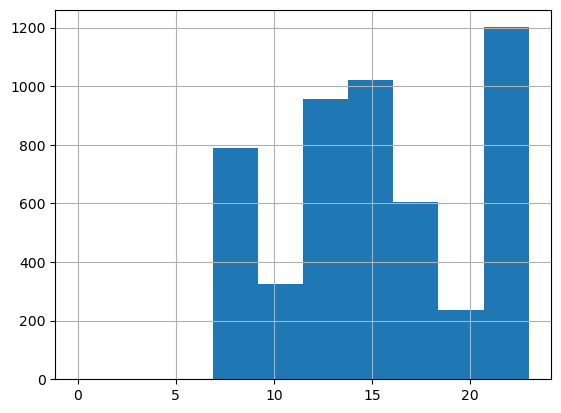

<Axes: >

dep_day


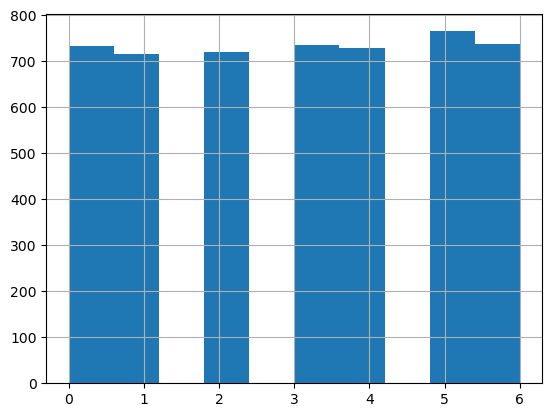

<Axes: >

Origin_Airport


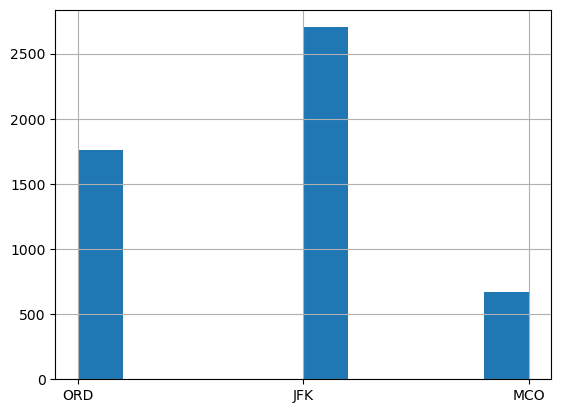

<Axes: >

arr_hour


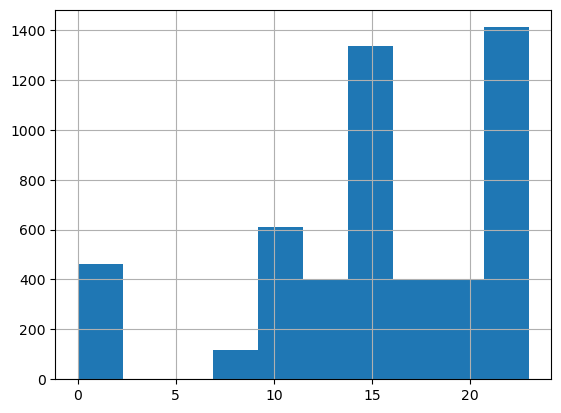

<Axes: >

arr_day


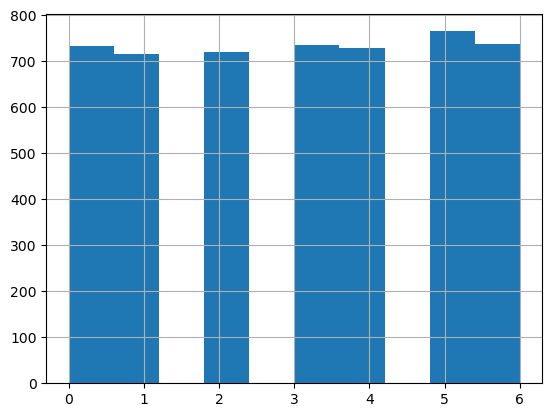

<Axes: >

dep_min


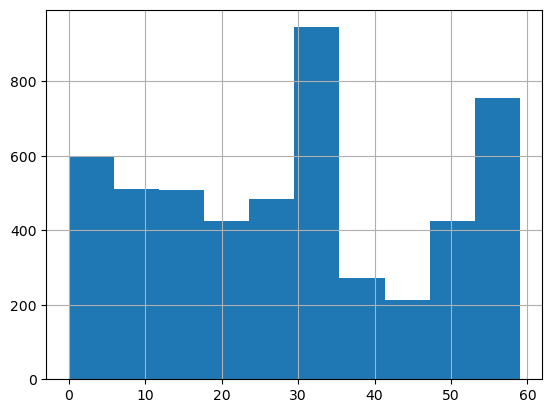

<Axes: >

arr_min


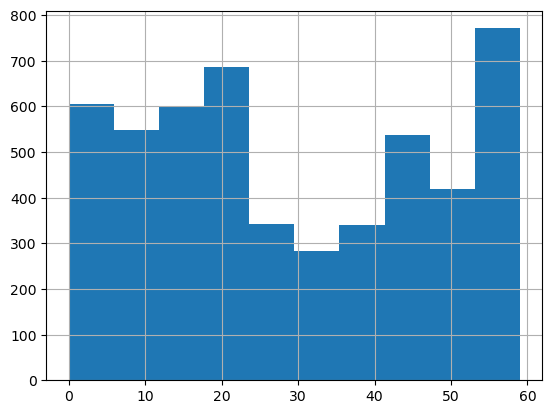

<Axes: >

arr_status


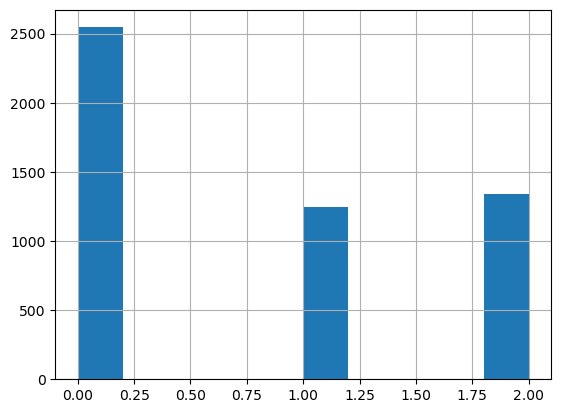

<Axes: >

count_x


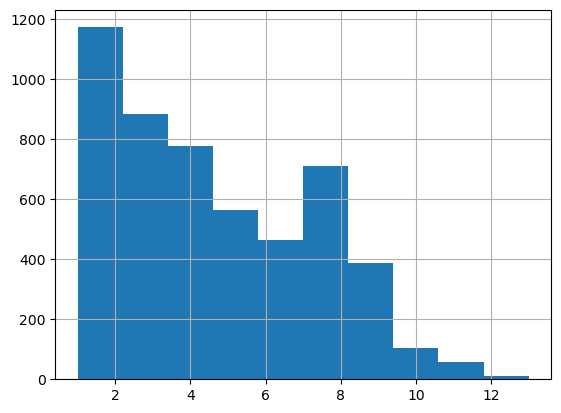

<Axes: >

count_y


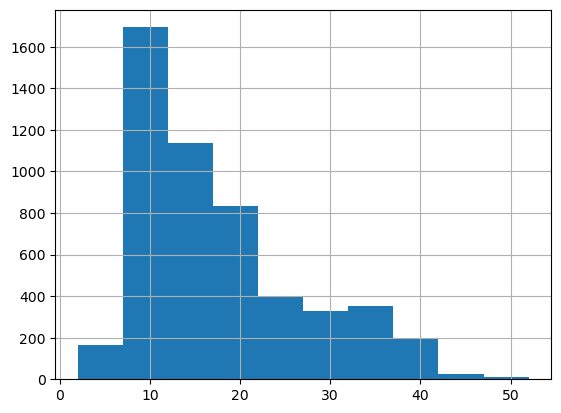

<Axes: >

arr_clouds


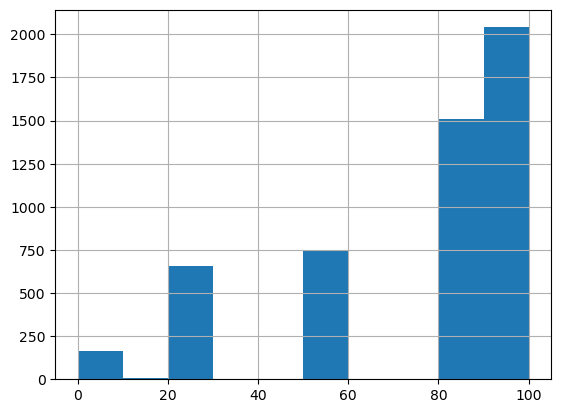

<Axes: >

arr_dewpt


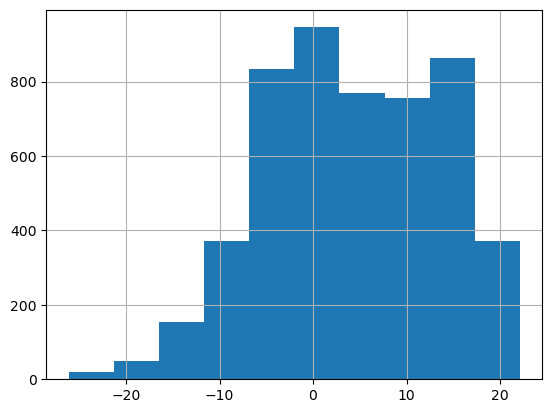

<Axes: >

arr_precip


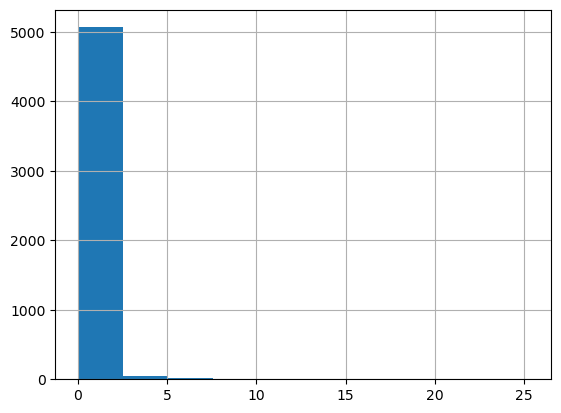

<Axes: >

arr_pres


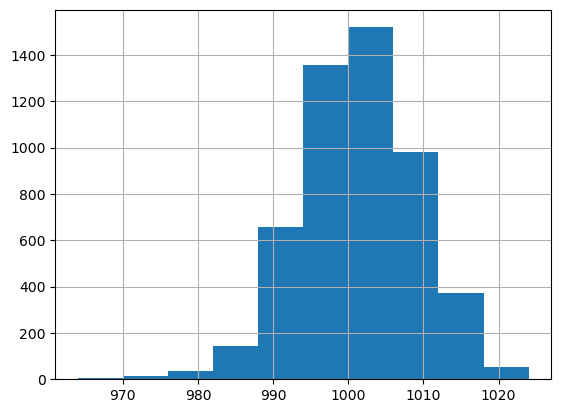

<Axes: >

arr_rh


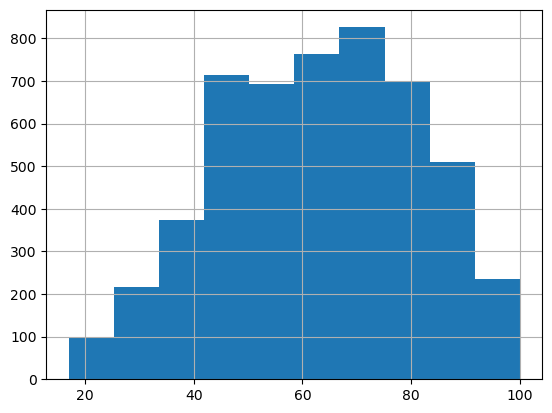

<Axes: >

arr_snow


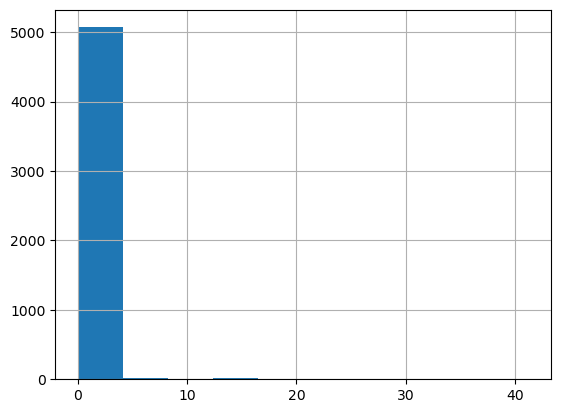

<Axes: >

arr_temp


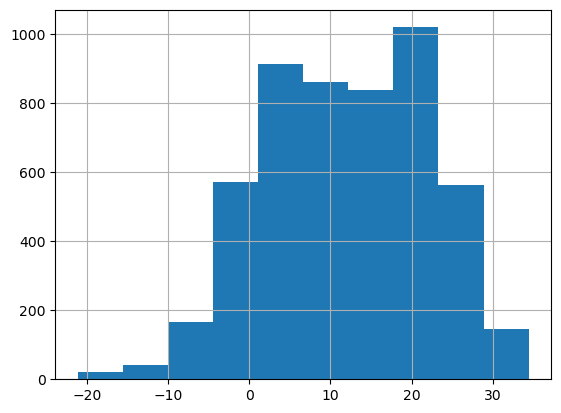

<Axes: >

arr_vis


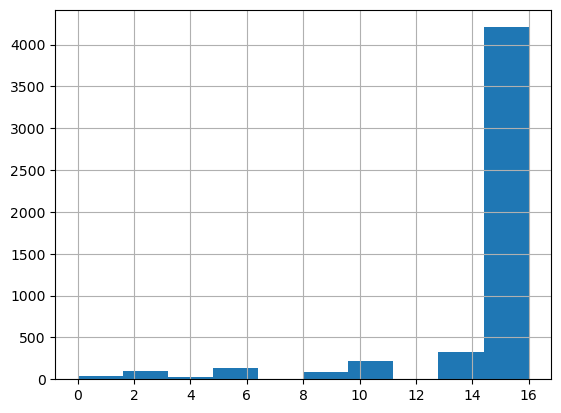

<Axes: >

arr_weather.code


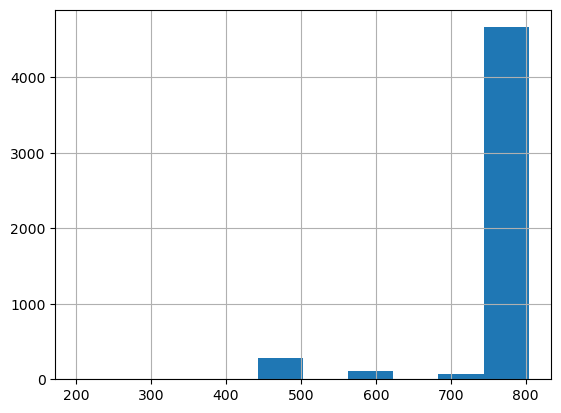

<Axes: >

arr_wind_dir


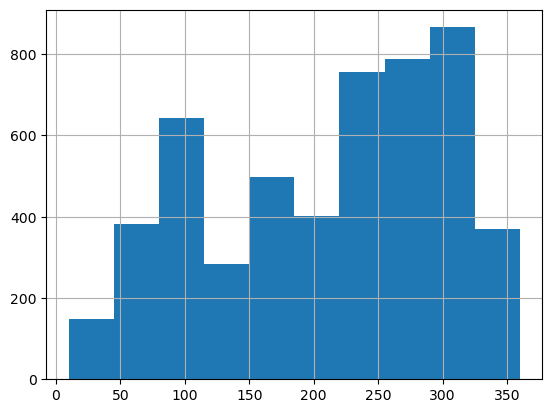

<Axes: >

arr_wind_gust_spd


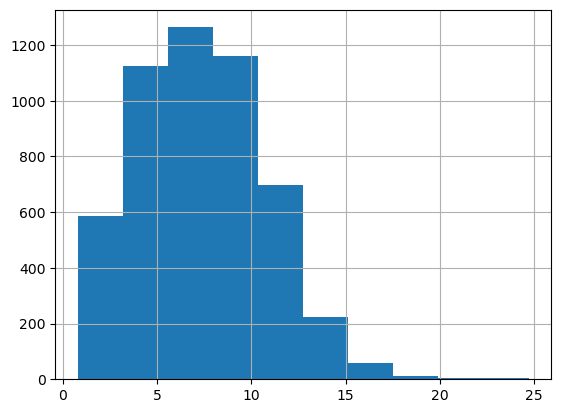

<Axes: >

arr_wind_spd


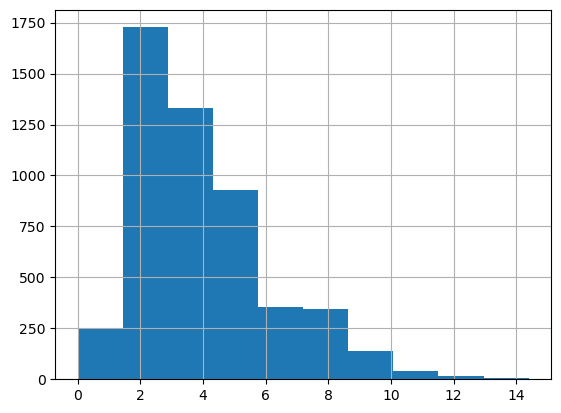

<Axes: >

dep_clouds


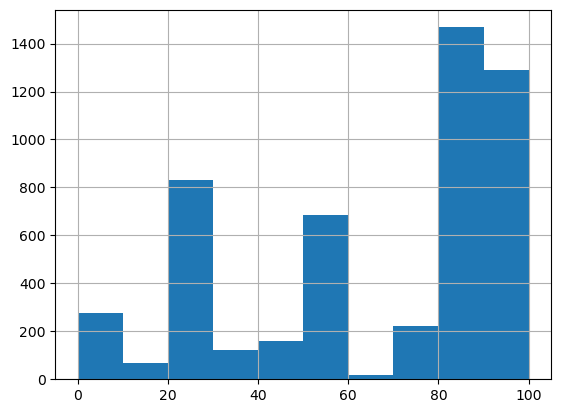

<Axes: >

dep_dewpt


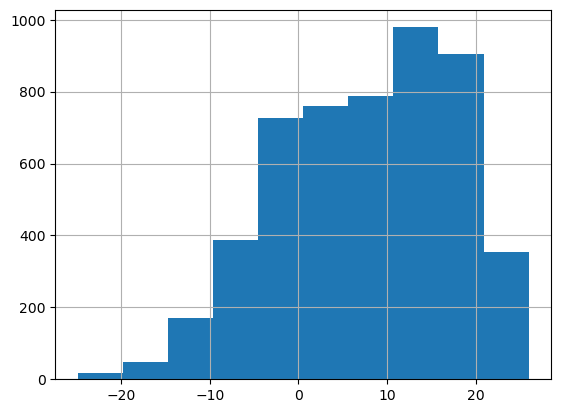

<Axes: >

dep_precip


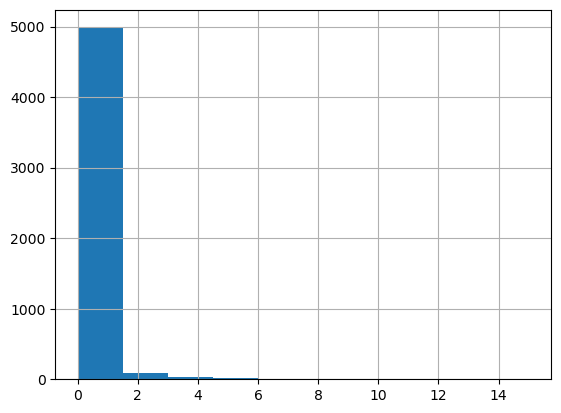

<Axes: >

dep_pres


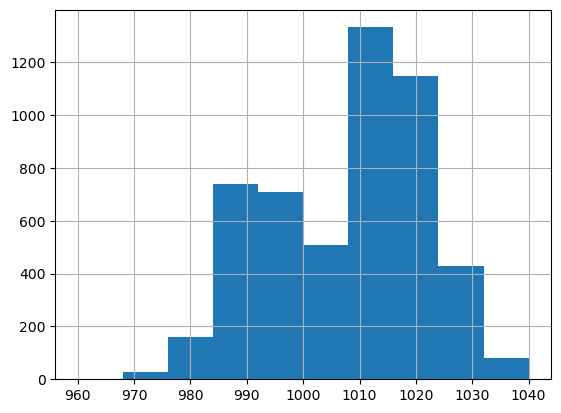

<Axes: >

dep_rh


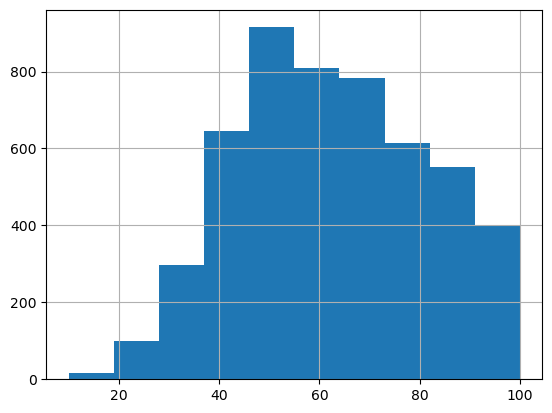

<Axes: >

dep_snow


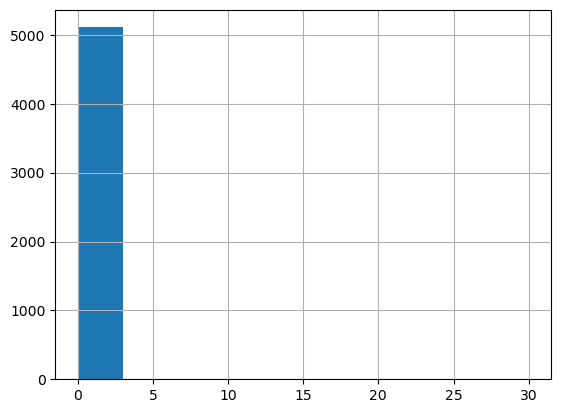

<Axes: >

dep_temp


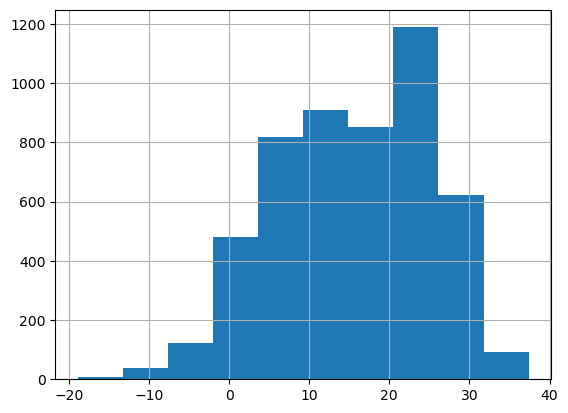

<Axes: >

dep_vis


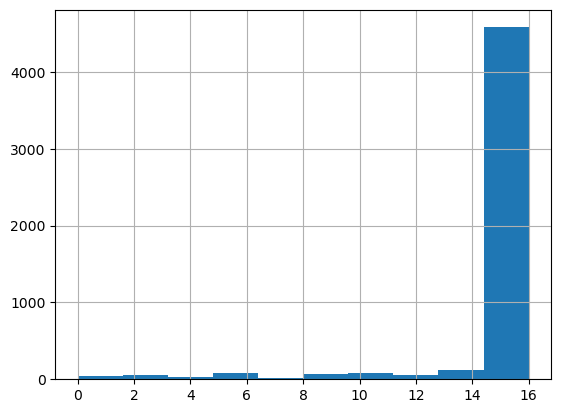

<Axes: >

dep_weather.code


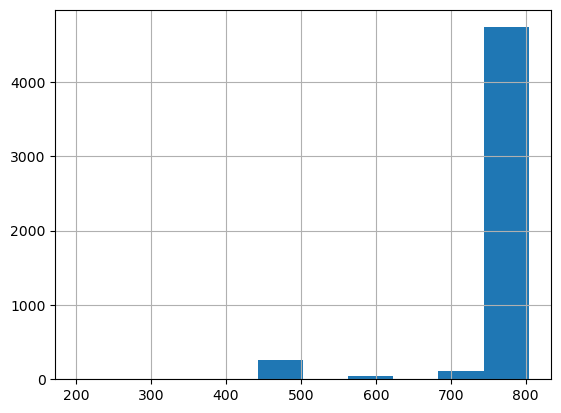

<Axes: >

dep_wind_dir


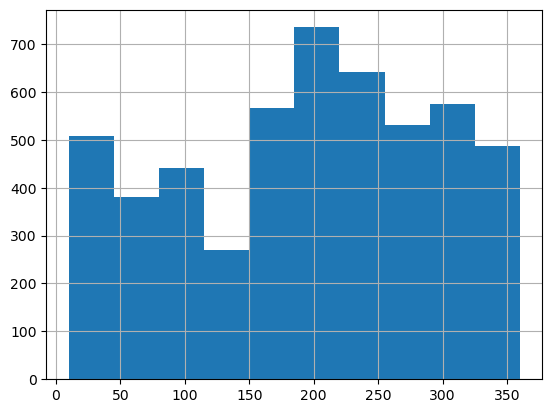

<Axes: >

dep_wind_gust_spd


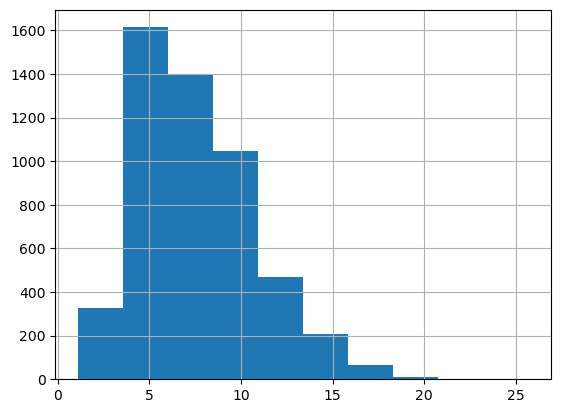

<Axes: >

dep_wind_spd


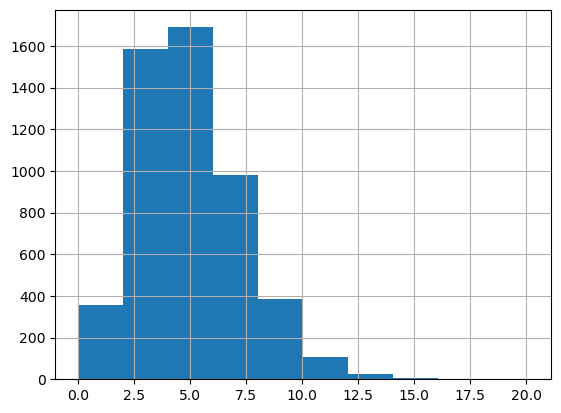

In [281]:
cols = sub_data.columns
print(cols)
for col in cols: 
    sub_data[col].hist()
    print(col)
    plt.show()

In [282]:
import plotly.express as px

In [283]:
sub_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'count_x', 'count_y', 'arr_clouds',
       'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
       'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [284]:
#for co in sub_data.columns:
fig = px.scatter(sub_data, y='dep_precip', x='arr_status', title='delay Over columns')
#fig.update_layout(height=1600, width=900, title_text="Stacked Subplots")
fig.show()

In [285]:
#sub_data['Carrier_Code'].unique()

In [286]:
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "MQ", "AA", sub_data["Carrier_Code"])
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "9E", "DL", sub_data["Carrier_Code"])

In [287]:
sub_data['Origin_Airport'].unique()

array(['ORD', 'JFK', 'MCO'], dtype=object)

In [288]:
su_data = sub_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])

#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'count_x', 'count_y', 'arr_clouds',
       'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
       'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [289]:
sub_data['dep_precip'] = sub_data['dep_precip']**2
sub_data['arr_precip'] = sub_data['arr_precip']**2

In [290]:
# correl = subset_data.corr()
correl = su_data.corr(numeric_only=True)

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [291]:
# su_data.drop(columns=['arr_min','dep_min'],inplace = True)
# su_data.columns

In [292]:
su_data = pd.get_dummies(su_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
su_data.head()
# su_data.dtypes
# su_data.columns

,arr_status,count_x,count_y,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,1,6,13,100,6.00,1.56,991,95,0.00,6.70,...,False,False,False,False,False,False,False,False,False,False
1,0,2,28,100,1.60,0.00,1001,85,0.00,3.90,...,False,False,False,False,False,False,False,False,True,False
2,0,5,39,100,1.70,0.00,999,79,0.00,5.00,...,False,False,False,False,False,False,False,False,True,False
3,2,3,25,100,-6.20,0.00,994,91,0.00,-5.00,...,False,False,False,False,False,False,False,False,True,False
4,2,3,31,100,-5.60,0.00,1003,91,0.00,-4.40,...,False,False,False,False,False,False,True,False,False,False


In [293]:
X_train, X_test, y_train, y_test = train_test_split(su_data.drop(columns = ['arr_status']), su_data['arr_status'],stratify = su_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,count_x,count_y,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
129,7,34,87,-4.80,0.00,1000,25,0.00,15.00,16,...,False,False,False,False,False,False,False,False,True,False
4475,4,7,100,-4.00,0.00,998,66,0.00,1.70,16,...,False,False,False,False,False,False,True,False,False,False
524,8,15,100,16.60,0.00,1004,73,0.00,21.70,16,...,False,False,False,False,False,False,True,False,False,False
3748,2,18,87,7.50,0.00,1002,51,0.00,17.80,16,...,False,False,False,False,False,False,False,False,True,False
9,4,29,25,-14.00,0.00,1011,76,0.00,-10.60,16,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4,38,87,18.10,0.00,1002,52,0.00,28.90,16,...,False,False,False,False,False,False,False,False,True,False
2227,2,10,100,-1.30,0.06,1010,42,0.00,11.10,16,...,False,False,False,False,False,False,False,False,True,False
4956,3,16,100,-2.30,0.00,993,96,0.00,-1.70,8,...,False,False,False,False,False,False,False,False,True,False
1093,1,23,0,3.30,0.00,990,76,0.00,7.20,16,...,False,False,False,False,False,False,False,False,True,False


,count_x,count_y,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
930,6,36,87,-12.80,0.00,994,54,0.00,-5.00,16,...,False,False,False,False,False,False,True,False,False,False
1124,3,9,100,2.10,1.00,996,40,0.00,15.60,16,...,False,False,False,False,False,False,False,False,True,False
3087,6,10,92,9.40,0.00,998,77,0.00,13.30,16,...,False,False,False,False,False,False,False,False,True,False
4821,2,18,87,2.70,0.00,1007,58,0.00,10.60,16,...,False,False,False,False,True,False,False,False,False,False
4578,3,9,50,4.20,0.00,998,42,0.00,17.20,16,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,2,13,87,-3.30,0.00,1002,47,0.00,7.20,16,...,False,False,False,False,False,False,False,False,True,False
627,4,29,44,5.90,0.00,1013,61,0.00,13.30,16,...,False,False,False,False,False,False,True,False,False,False
4427,1,13,100,-2.90,0.00,1014,69,0.00,2.20,16,...,False,False,False,False,False,False,True,False,False,False
3749,5,12,87,0.90,0.00,1005,75,0.00,5.00,16,...,False,False,False,False,False,False,False,True,False,False


dtype('int32')

930     0
1124    0
3087    0
4821    2
4578    0
       ..
3670    0
627     1
4427    0
3749    1
4394    2
Name: arr_status, Length: 1027, dtype: int32

In [294]:
# y = X_train['arr_status']
# u = X_test['arr_status']
# X_train.drop(columns=['arr_status'], inplace=True)
# X_test.drop(columns=['arr_status'], inplace=True)

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,count_x,count_y,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
129,0.91,1.81,0.37,-0.98,-0.05,-0.11,-2.08,-0.10,0.31,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
4475,-0.24,-1.10,0.81,-0.90,-0.05,-0.37,0.18,-0.10,-1.01,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
524,1.30,-0.23,0.81,1.34,-0.05,0.41,0.57,-0.10,0.98,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
3748,-1.00,0.09,0.37,0.35,-0.05,0.15,-0.65,-0.10,0.59,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
9,-0.24,1.27,-1.72,-1.98,-0.05,1.31,0.74,-0.10,-2.24,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,-0.24,2.24,0.37,1.51,-0.05,0.15,-0.59,-0.10,1.70,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
2227,-1.00,-0.77,0.81,-0.60,-0.05,1.18,-1.14,-0.10,-0.07,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
4956,-0.62,-0.13,0.81,-0.71,-0.05,-1.02,1.84,-0.10,-1.35,-2.14,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
1093,-1.39,0.63,-2.56,-0.10,-0.05,-1.40,0.74,-0.10,-0.46,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00


,count_x,count_y,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
930,0.53,2.03,0.37,-1.85,-0.05,-0.89,-0.48,-0.10,-1.68,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
1124,-0.62,-0.88,0.81,-0.23,0.03,-0.63,-1.25,-0.10,0.37,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
3087,0.53,-0.77,0.54,0.56,-0.05,-0.37,0.79,-0.10,0.14,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
4821,-1.00,0.09,0.37,-0.17,-0.05,0.80,-0.26,-0.10,-0.12,0.38,...,-0.07,0.00,-0.13,0.00,4.53,-0.15,-0.48,-0.44,-1.01,0.00
4578,-0.62,-0.88,-0.87,-0.01,-0.05,-0.37,-1.14,-0.10,0.53,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,2.28,-1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,-1.00,-0.45,0.37,-0.82,-0.05,0.15,-0.87,-0.10,-0.46,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,-0.44,0.99,0.00
627,-0.24,1.27,-1.08,0.18,-0.05,1.57,-0.09,-0.10,0.14,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
4427,-1.39,-0.45,0.81,-0.78,-0.05,1.70,0.35,-0.10,-0.96,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,2.09,-0.44,-1.01,0.00
3749,0.15,-0.56,0.37,-0.36,-0.05,0.54,0.68,-0.10,-0.68,0.38,...,-0.07,0.00,-0.13,0.00,-0.22,-0.15,-0.48,2.28,-1.01,0.00


129     1
4475    0
524     0
3748    1
9       2
       ..
1450    0
2227    0
4956    0
1093    0
1349    0
Name: arr_status, Length: 4107, dtype: int32

930     0
1124    0
3087    0
4821    2
4578    0
       ..
3670    0
627     1
4427    0
3749    1
4394    2
Name: arr_status, Length: 1027, dtype: int32

In [296]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.5751156561967373

array([[ 5.36145928e-02, -1.48733541e-01,  3.89092573e-01,
         2.22361991e-01, -6.09094455e-01, -1.38968140e-02,
        -3.09184344e-01,  8.09678470e-03, -2.00822886e-01,
         6.39206926e-02, -1.29061038e-01,  4.85285371e-03,
        -1.07130569e-01, -1.88462140e-01,  7.43871535e-01,
        -2.24398191e-01, -1.77417839e-02, -4.58585716e-01,
        -1.47838218e-01, -7.85354386e-01,  3.84751115e-02,
        -4.34159178e-02, -2.71305907e-01,  9.13250181e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.03903124e-02,  4.36123829e-01,  4.82654453e-01,
         2.02293271e-01,  5.66780456e-02,  1.86035736e-01,
         8.09299280e-02,  9.32787815e-02, -1.21535559e-01,
        -7.47308648e-02, -1.51770641e-02, -4.03181292e-02,
        -2.44616345e-01, -9.36517587e-02, -2.45887481e-01,
        -5.38164207e-01, -1.61989829e-01,  5.47921315e-02,
         6.61554055e-02,  4.71334457e-02,  2.42628044e-0

array([-0.04419946, -1.26106794, -1.24859412])

In [297]:
model.score(X_test,y_test)


0.5180136319376826

In [234]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
model.score(X_test, y_test)

,pred_arr_status,arr_status
4979,0,2
4823,2,2
4796,0,0
1676,0,0
5619,2,0
2800,0,1
1844,0,2
2037,2,0
4406,0,2
3978,2,2


0.5208888888888888

In [235]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

clf = clf.fit(X_train, y_train) 
clf.score(X_train, y_train)

clf.feature_importances_
linear_reg_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
clf.score(X_test, y_test)

0.8546020453534905

array([2.47497243e-02, 4.63980761e-02, 1.45382425e-02, 5.35519566e-02,
       8.50577367e-03, 3.56850936e-02, 6.26860245e-02, 0.00000000e+00,
       3.07828651e-02, 8.46334716e-03, 5.99693414e-02, 3.84447726e-02,
       4.90355042e-02, 1.43822200e-02, 5.23065761e-02, 1.83713713e-03,
       4.55927624e-02, 5.37116296e-02, 0.00000000e+00, 4.96363225e-02,
       1.21551871e-02, 4.74762302e-02, 4.37056984e-02, 6.05605884e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.46269990e-03,
       5.69093260e-03, 1.62677154e-03, 2.85441439e-03, 0.00000000e+00,
       7.08322163e-03, 3.04931391e-03, 2.62283275e-03, 9.51773257e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.93782739e-03, 6.95519671e-03, 0.00000000e+00, 3.82111141e-03,
       1.43423694e-03, 1.98050371e-03, 2.30382708e-03, 1.88248127e-03,
       3.23817406e-03, 1.62234078e-04, 1.00363394e-02, 0.00000000e+00,
      

,pred_arr_status,arr_status
4979,2,2
4823,0,2
4796,0,0
1676,1,0
5619,0,0
2800,1,1
1844,2,2
2037,2,0
4406,0,2
3978,0,2


0.42488888888888887

0.7158737216540685

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_dewpt           0.05
arr_rh              0.05
dep_temp            0.05
arr_dewpt           0.05
dep_rh              0.05
dep_wind_gust_spd   0.05
arr_temp            0.04
dep_wind_spd        0.04
count_y             0.04
dep_wind_dir        0.04
dep_pres            0.04
arr_wind_gust_spd   0.03
dtype: float64

,pred_Y
4979,2
4823,0
4796,0
1676,2
5619,0


,pred_Y,arr_status
4979,2,2
4823,0,2
4796,0,0
1676,2,0
5619,0,0


Fraction of correct classification 


0.5244444444444445

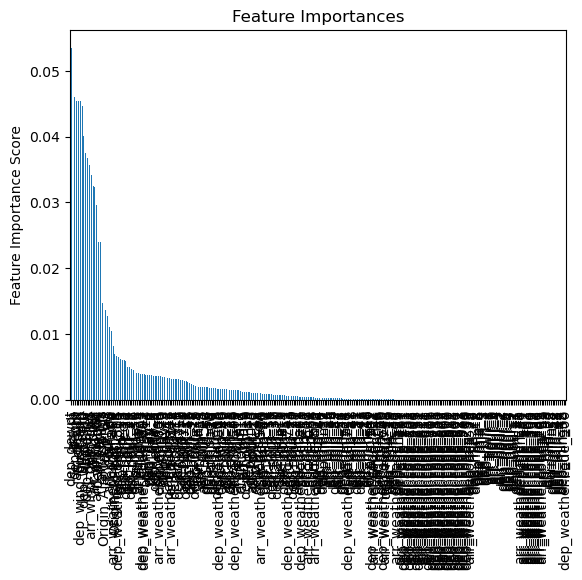

<Figure size 2000x1000 with 0 Axes>

In [236]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

rf = rf.fit(X_train, y_train) 
rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test, y_test) 

In [237]:
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

gb = gb.fit(X_train, y_train) 
gb.score(X_train, y_train) 

0.871498443752779

In [238]:
linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
gb.score(X_test,y_test)

,pred_arr_status,arr_status
4979,0,2
4823,0,2
4796,0,0
1676,2,0
5619,2,0
2800,1,1
1844,2,2
2037,2,0
4406,0,2
3978,1,2


0.5173333333333333

In [43]:
pred_data1 = pd.read_csv('pred_data1.csv')
pred_data1.head()
pred_data1.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,18,2,ORD,21,2,52,47,77,7.00,...,0.00,983.50,43,0,16.40,24.13,804,73,4.43,3.33
1,2,13,2,JFK,14,2,33,50,84,9.40,...,0.25,"1,015.00",77,0,11.90,0.10,804,96,4.33,3.60
2,4,11,2,MCO,13,2,5,45,86,9.50,...,0.00,"1,015.00",63,0,25.20,26.50,803,150,9.60,6.40
3,6,18,3,ORD,21,3,52,47,89,11.40,...,0.58,971.50,70,0,10.90,24.10,301,323,16.93,11.33
4,8,13,3,JFK,14,3,33,50,92,11.10,...,0.25,"1,011.00",81,0,12.70,24.13,804,140,9.46,6.26


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [44]:

pred_data1['dep_min'] = pred_data1['dep_min'].astype('object')
pred_data1['arr_min'] = pred_data1['arr_min'].astype('object')
pred_data1['dep_hour'] = pred_data1['dep_hour'].astype('object')
pred_data1['dep_day'] = pred_data1['dep_day'].astype('object')
pred_data1['arr_hour'] = pred_data1['arr_hour'].astype('object')
pred_data1['arr_day'] = pred_data1['arr_day'].astype('object')
pred_data1['dep_weather.code'] = pred_data1['dep_weather.code'].astype('object')
pred_data1['arr_weather.code'] = pred_data1['arr_weather.code'].astype('object')
pred_data1.drop(columns=['Unnamed: 0'],inplace=True)
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd']]

pred_data1.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [45]:
pred_data1['dep_hour'] = pd.Categorical(pred_data1['dep_hour'], categories=[i for i in range(24)])
pred_data1['dep_day'] = pd.Categorical(pred_data1['dep_day'], categories=[i for i in range(7)])
pred_data1['dep_min'] = pd.Categorical(pred_data1['dep_min'], categories=[i for i in range(60)])
pred_data1['arr_hour'] = pd.Categorical(pred_data1['arr_hour'], categories=[i for i in range(24)])
pred_data1['arr_day'] = pd.Categorical(pred_data1['arr_day'], categories=[i for i in range(7)])
pred_data1['arr_min'] = pd.Categorical(pred_data1['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data1['Origin_Airport'] = pd.Categorical(pred_data1['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
pred_data1['arr_weather.code'] = pd.Categorical(pred_data1['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data1['dep_weather.code'] = pd.Categorical(pred_data1['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [46]:
pred_data1 = pd.get_dummies(pred_data1, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data1.head()
pred_data1.dtypes
pred_data1.columns

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,77,7.00,0.25,999.00,66,0,13.30,24.13,100,4.13,...,False,False,False,False,False,False,False,False,True,False
1,84,9.40,0.25,997.50,60,0,17.20,19.70,280,6.90,...,False,False,False,False,False,False,False,False,True,False
2,86,9.50,0.25,997.50,62,0,16.80,22.10,256,6.73,...,False,False,False,False,False,False,False,True,False,False
3,89,11.40,0.76,983.50,70,0,16.90,4.08,150,17.10,...,False,False,False,False,False,False,False,False,False,False
4,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,False,True,False


arr_clouds                int64
arr_dewpt               float64
arr_precip              float64
arr_pres                float64
arr_rh                    int64
                         ...   
dep_weather.code_801       bool
dep_weather.code_802       bool
dep_weather.code_803       bool
dep_weather.code_804       bool
dep_weather.code_900       bool
Length: 270, dtype: object

Index(['arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_wind_dir', 'arr_wind_gust_spd',
       ...
       'dep_weather.code_721', 'dep_weather.code_731', 'dep_weather.code_741',
       'dep_weather.code_751', 'dep_weather.code_800', 'dep_weather.code_801',
       'dep_weather.code_802', 'dep_weather.code_803', 'dep_weather.code_804',
       'dep_weather.code_900'],
      dtype='object', length=270)

In [47]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data1), columns = pred_data1.columns, index = pred_data1.index)


In [50]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
#linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(30)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,pred_arr_status
0,0
1,0
2,1
3,2
4,0
5,2
6,0
7,0
8,2
9,0


In [49]:
pred_data1.head(20)

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,77,7.00,0.25,999.00,66,0,13.30,24.13,100,4.13,...,False,False,False,False,False,False,False,False,True,False
1,84,9.40,0.25,997.50,60,0,17.20,19.70,280,6.90,...,False,False,False,False,False,False,False,False,True,False
2,86,9.50,0.25,997.50,62,0,16.80,22.10,256,6.73,...,False,False,False,False,False,False,False,True,False,False
3,89,11.40,0.76,983.50,70,0,16.90,4.08,150,17.10,...,False,False,False,False,False,False,False,False,False,False
4,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,False,True,False
5,92,11.10,0.50,988.50,64,0,18.00,24.13,140,16.40,...,False,False,False,False,False,False,False,True,False,False
6,76,3.20,0.25,975.00,62,0,10.10,22.62,233,14.25,...,False,False,False,False,False,False,True,False,False,False
7,82,7.00,0.50,972.50,59,0,14.90,17.46,230,14.10,...,False,False,False,False,False,False,False,False,False,False
8,82,7.00,0.50,972.50,59,0,14.90,17.46,230,14.10,...,False,False,False,False,False,True,False,False,False,False
9,75,1.10,0.00,992.30,66,0,7.00,24.13,276,13.70,...,False,False,False,False,False,False,True,False,False,False
